# Life history trade-offs: Antibiotic Resistance and Vaccination

### Simulation of a first basic SIR model

#### followed closely after the tutorial from https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

In [86]:
#imports

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [87]:
#initialising variables

#total population size
N = 1000 

#prior immune and recovered
I0, R0 = 1, 0

#prior susceptible
S0 = N - I0 - R0

#contact rate beta and recovery rate gamma
beta, gamma = 0.25, 1./10

#initial grid
t = np.linspace(0, 160, 160)

In [88]:
#PRE: all variables are positive integers
#POST: The SIR model

def SIR (y, t, N, beta, gamma):
    S, I, R = y
    dSdt = - beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I

    return dSdt, dIdt, dRdt


### adding birthrate and deathrates to this model

In [89]:
#adding birth and death rates to the simple SIR model
Lambda = 0.75
deltaS = 0.1
deltaI = 0.3
deltaR = 0.1

In [90]:
#PRE: all variables are positive integers
#POST: The SIR model with death rates

def SIRcomplex (y, t, N, beta, gamma, Lambda, deltaS, deltaI, deltaR):
    S, I, R = y
    dSdt = Lambda - deltaS * S - beta * S * I
    dIdt = beta * S * I  - deltaI * I - gamma * I
    dRdt = gamma * I - deltaR

    return dSdt, dIdt, dRdt


### Solving the ODE systems

In [91]:
#initial vector
y0 = S0, I0, R0

#numerically integrate the ODEs
sol = odeint(SIR, y0, t, args=(N, beta, gamma))
S1, I1, R1 = sol.T

In [92]:
#numerically integrate the ODEs
sol = odeint(SIRcomplex, y0, t, args=(N, beta, gamma, Lambda, deltaS, deltaI, deltaR))
S2, I2, R2 = sol.T

### plotting the results

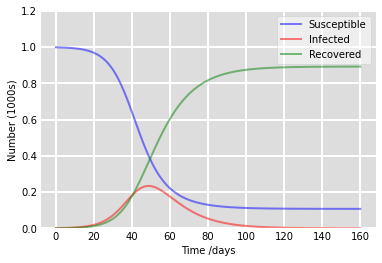

In [93]:
#plot
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S1/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I1/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R1/1000, 'g', alpha=0.5, lw=2, label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

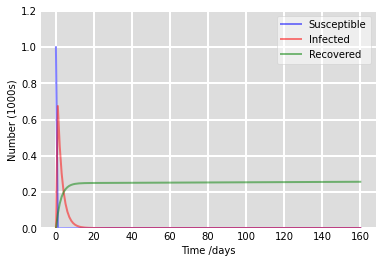

In [94]:
#plot
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S2/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I2/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R2/1000, 'g', alpha=0.5, lw=2, label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()